# Question 10: Simulation

## Sec. 8.2 Ex. 4.
When the motion of a microscopic particle in a liquid or a gas is observed, it is seen that the motion is irregular because the particle collides frquently with other particles . The probability model for this motion, which is called *Brownian motion*, is as follows: A coordinate system is chosen in the liquid of gas. Suppose that the particle is at the origin of this coordiate system at time $t=0$, and let $(X,Y,Z)$ denote the coordinated of the particle at any time $t > 0$. The random variables $X,Y$ and $Z$ are i.i.d., and each of them has the normal distribution with mean 0 and variance $\sigma^2 t$. Find the probability that at time $t=2$ the particle will lie within a spehere whose center is at the origiin and whose radius is $4\sigma$. 

### Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

MovieWriter ffmpeg unavailable; using Pillow instead.


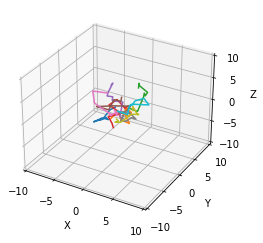

In [28]:

def random_walk(num_steps):
    start_pos = np.array([0,0,0])
    steps = np.random.normal(loc=0.0, scale=1.0, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


num_steps = 10
num_particles = 10
walks = [random_walk(num_steps) for t in range(num_particles)]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

lines = [ax.plot([], [], [])[0] for _ in walks]

ax.set(xlim3d=(-10, 10), xlabel='X')
ax.set(ylim3d=(-10, 10), ylabel='Y')
ax.set(zlim3d=(-10, 10), zlabel='Z')

ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)
ani.save("q8.gif")
plt.show()